In [ ]:
import torch
from torch import nn

import torchvision
import torch.nn.functional as F
from torchvision import datasets
import torch.optim as optim

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
mnist = datasets.MNIST(root="./data", train = True, download = True)

In [ ]:
features = mnist.data
labels = mnist.targets

In [ ]:
features[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

<function matplotlib.pyplot.show(close=None, block=None)>

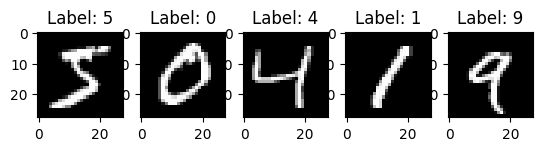

In [ ]:
fig, ax = plt.subplots(1,5)
for i in range(5):
  ax[i].imshow(features[i].numpy(), cmap ='gray')
  ax[i].title.set_text("Label: "+ str(labels[i].item()))
plt.show

In [ ]:
features[1].shape

torch.Size([28, 28])

In [ ]:
features.shape

torch.Size([60000, 28, 28])

In [ ]:
features.reshape(-1,28*28)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

In [ ]:
features.shape

torch.Size([60000, 28, 28])

In [ ]:
features[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [ ]:
len(features)

60000

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size = 0.2)

In [ ]:
X_train.type

<function Tensor.type>

In [ ]:
#already tensors so don't need this step
X_train = torch.tensor(X_train)

<ipython-input-136-6935c99f68eb>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train)


In [ ]:
features[0].view(-1,1,28,28)

tensor([[[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
            18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
          [  0,   0,  

In [ ]:
# Wout = (W-F)/S +1
# W is the width of the matrix you apply the filter to
# F is the width of the filter/pool
# S i sthe stride length (for pooling the stride length is teh same F)

class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, 3, 1)
    # 1 input (1 image at a time), 32 outputs (send image to 32 filters), 3x3 filter, 1 stride
    self.conv2 = nn.Conv2d(32, 64, 3, 1)
    # 32 inputs (grab 32 activation maps), 64 outputs (send image to 64 filters), 3x3 filter, 1 stride
    self.dropout = nn.Dropout(0.25) #randomly ignores 25% of the feature maps in order to reduce overfitting
    #Wout = (W-F+2P)/S +1
    self.fc1 = nn.LazyLinear( 128)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
    x = x.view(-1, 1, 28, 28)
    x = self.conv1(x)
    #Wout = (28-3)/1+1 = 26
    x = F.relu(x)
    x = F.max_pool2d(x, 2)
    ## Wout = (26 - 2)/2 + 1 = 14
    x = self.conv2(x)
    # Wout = (14 - 3)/1 + 1 = 12
    x = F.relu(x)
    x = F.max_pool2d(x, 2)
    # Wout = (12 - 2)/2 + 1 = 12
    x = self.dropout(x)
    #take it frm a 28x28 image to a single array which can be passed into the normal nn
    x = torch.flatten(x, 1)
    # var = len(x)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    output = F.log_softmax(x, dim=1)
    return output

In [ ]:
model = ConvNet()

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr =0.01)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size = 64)

In [ ]:
epochs = 2

for epoch in range(epochs):
  running_loss =0.0
  for inputs, labels in train_loader:
    #inputs, labels = data
    #outputs = model(inputs)
    optimizer.zero_grad()
    inputs = inputs.float()
    outputs = model(inputs)
    loss = loss_fn(outputs, labels)
    running_loss += loss.item()
    loss.backward() #backprop
    optimizer.step() #update weights
  print(f"Epoch: {epoch+1}/ {epochs}, Loss = {running_loss/len(train_loader)}")

Epoch: 1/ 2, Loss = 0.9805076313537235
Epoch: 2/ 2, Loss = 0.09257321882930895


In [ ]:
test_data = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size = 64)

In [ ]:
correct = 0.0
total = 0.0
with torch.no_grad():
  for inputs, labels in test_loader:
    inputs = inputs.float()
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data,1)
    total += len(labels)
    correct  +=(predicted == labels).sum().item()
print(f"Accuracy of the model: {100* correct/total}%")

Accuracy of the model: 97.44166666666666%
